In [3]:
import pandas as pd
import numpy as np
input_file = "/Users/jacquelinezhu/Desktop/SleepdB/acoustic_project/codes/AcousticFeatures_April16_May14_sahh.xlsx"
df = pd.read_excel(input_file).dropna(how='all')
X = df.loc[:, 'shEnt':'PXX_diff_SMA'].values
y = df['AHI_scaled'].values

In [4]:
params = {
    'n_estimators': 500,        # try higher values
    'learning_rate': 0.01,      # lower to improve generalization
    'max_depth': 10,             # allow more complex trees
    'min_child_weight': 1,      # lower = more sensitive splits
    'subsample': 0.8,           # prevent overfitting
    'colsample_bytree': 0.8,    # prevent overfitting
    'reg_alpha': 0.1,           # L1 regularization
    'reg_lambda': 1.0,          # L2 regularization
}

In [5]:
from xgboost import XGBRegressor
from sklearn.model_selection import LeaveOneOut
import numpy as np

loo = LeaveOneOut()

y_true_test, y_pred_test = [], []
y_true_train, y_pred_train = [], []

for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    model = XGBRegressor(**params)
    model.fit(X_train, y_train)

    yhat_test = model.predict(X_test)
    yhat_train = model.predict(X_train)

    y_true_test.extend(y_test)
    y_pred_test.extend(yhat_test)
    y_true_train.extend(y_train)
    y_pred_train.extend(yhat_train)

y_true_test = np.array(y_true_test)
y_pred_test = np.array(y_pred_test)
y_true_train = np.array(y_true_train)
y_pred_train = np.array(y_pred_train)

In [6]:
from sklearn.metrics import mean_squared_error

mse_train = mean_squared_error(y_true_train, y_pred_train)
mse_test = mean_squared_error(y_true_test, y_pred_test)
print(mse_train)
print(mse_test)

0.00635593132660802
1.1665364174174326


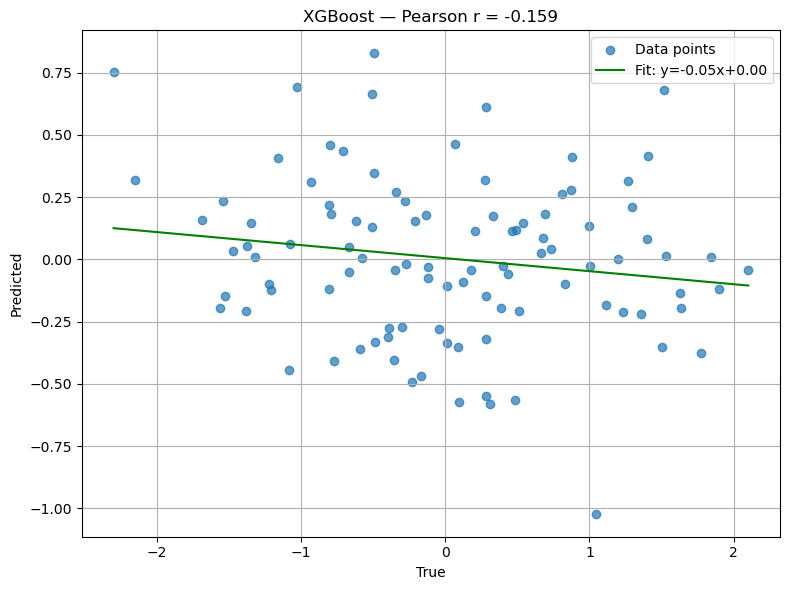

In [7]:
import matplotlib.pyplot as plt
from scipy.stats import linregress, pearsonr

slope, intercept, r_value, p_value, std_err = linregress(y_true_test, y_pred_test)
line_x = np.linspace(y_true_test.min(), y_true_test.max(), 100)
line_y = slope * line_x + intercept

corr, _ = pearsonr(y_true_test, y_pred_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_true_test, y_pred_test, alpha=0.7, label="Data points")
plt.plot(line_x, line_y, 'g-', label=f"Fit: y={slope:.2f}x+{intercept:.2f}")
plt.xlabel("True")
plt.ylabel("Predicted")
plt.title(f"XGBoost — Pearson r = {corr:.3f}")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

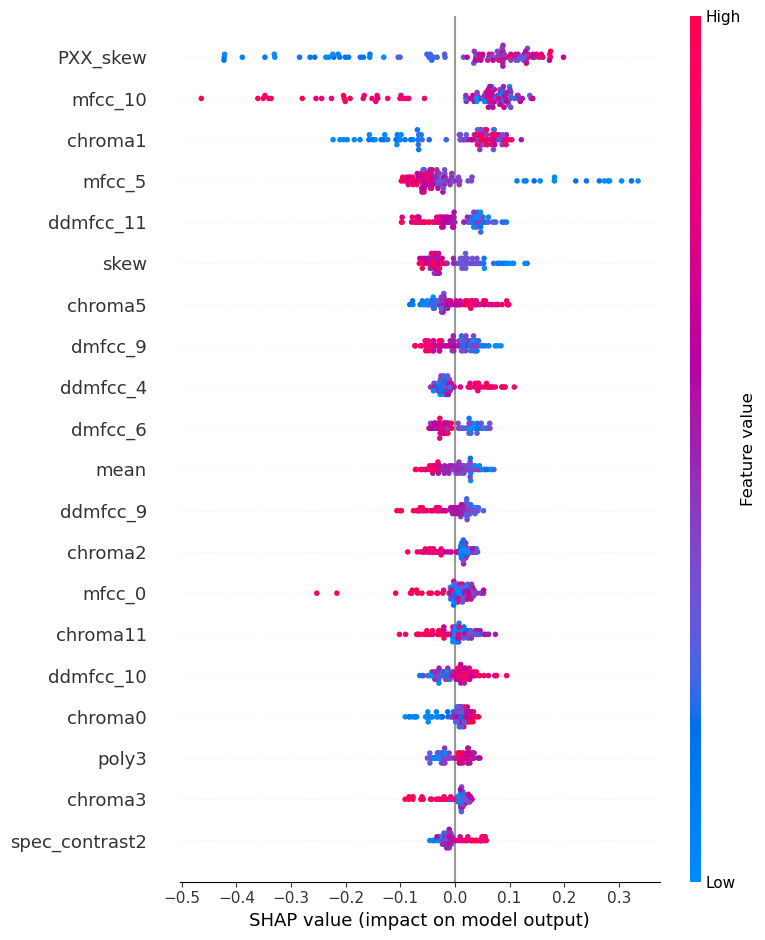

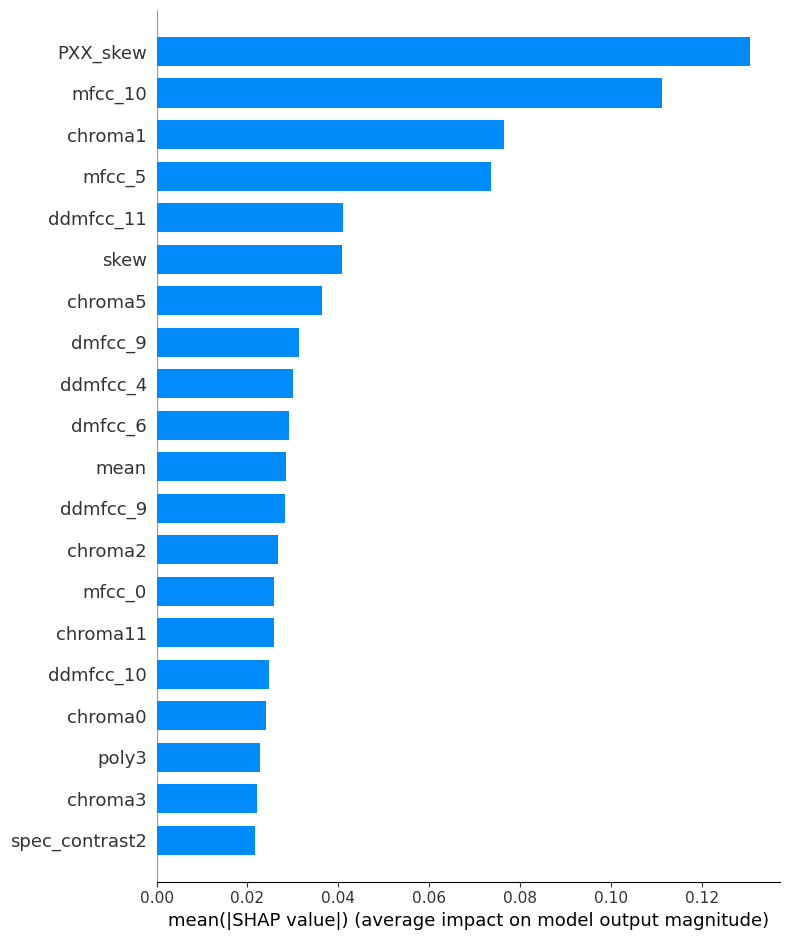

'feature_names = df.loc[:, \'shEnt\':\'PXX_diff_SMA\'].columns\nshap_importance = np.abs(shap_values.values).mean(axis=0)\nshap_df = pd.DataFrame({\n    "feature": feature_names,\n    "mean_abs_shap": shap_importance\n}).sort_values("mean_abs_shap", ascending=False).reset_index(drop=True)\n\noutput_file = "sahh_shap_importance.xlsx"\nshap_df.to_excel(output_file, index=False)'

In [11]:
import shap

# Create SHAP explainer
explainer = shap.Explainer(model, X)
shap_values = explainer(X)

# Summary plot (global importance)
shap.summary_plot(shap_values, X, feature_names=df.loc[:, 'shEnt':'PXX_diff_SMA'].columns)
shap.summary_plot(shap_values, X, feature_names=df.loc[:, 'shEnt':'PXX_diff_SMA'].columns, plot_type="bar")


'''feature_names = df.loc[:, 'shEnt':'PXX_diff_SMA'].columns
shap_importance = np.abs(shap_values.values).mean(axis=0)
shap_df = pd.DataFrame({
    "feature": feature_names,
    "mean_abs_shap": shap_importance
}).sort_values("mean_abs_shap", ascending=False).reset_index(drop=True)

output_file = "sahh_shap_importance.xlsx"
shap_df.to_excel(output_file, index=False)'''
